In [1]:
import pandas as pd
import numpy as np
import sklearn 
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_white"

np.random.seed(42)
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Get the Data
___

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")

## Take a quick look at the structure

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


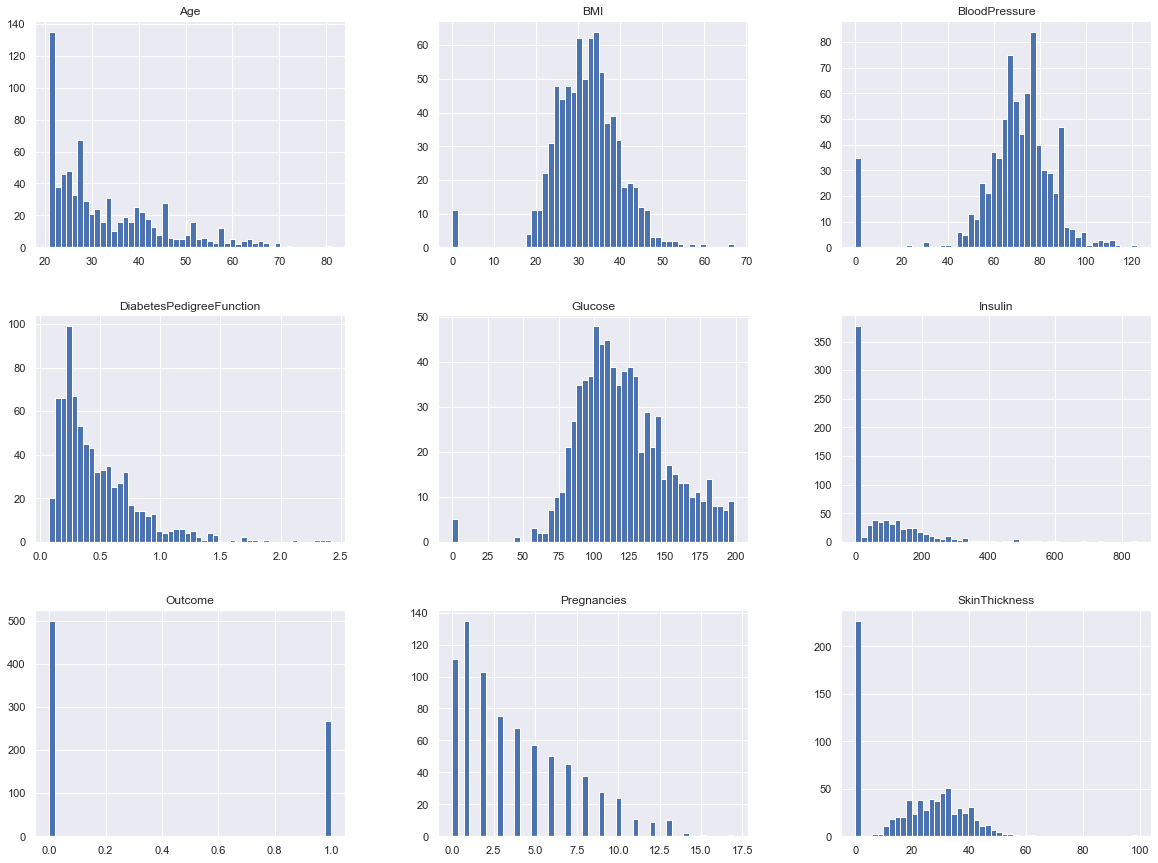

In [6]:
p = diabetes_data.hist(bins=50, figsize=(20,15))

__Some value are set to 0 and look weird__ 

 1. skinthickness
 2. glucose
 3. bloodPressure
 4. insulin
 5. BMI
 
 
→ __`Glucose`, `Blood pressure`, `SkinThickness`, `BMI`  can't be 0__ 

#### Can insulin level be zero?
__YES__, a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn't go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes.

In [7]:
# replace zero values by NaN 
outliers_columns = ['BloodPressure', 'BMI', 'Glucose', 'SkinThickness']
 
diabetes_data[outliers_columns] = diabetes_data[outliers_columns].replace(0, np.NaN)

# replace nan with the median
diabetes_data[outliers_columns] = diabetes_data[outliers_columns].fillna(diabetes_data[outliers_columns].median())

### Plotting after Nan removal

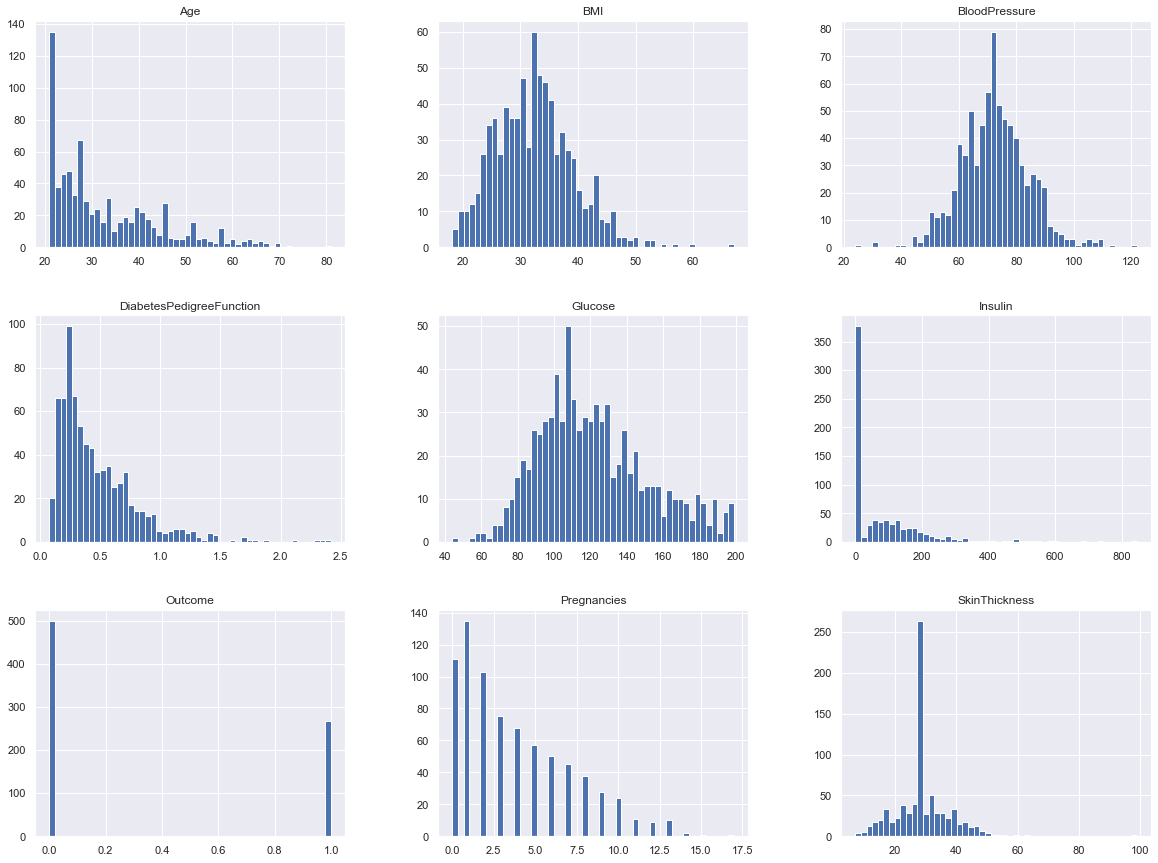

In [8]:
p = diabetes_data.hist(bins=50, figsize=(20,15))

## Target

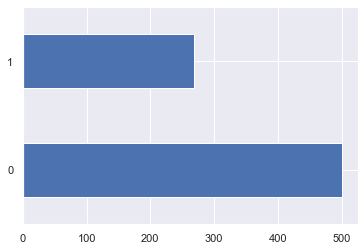

In [9]:
p = diabetes_data['Outcome'].value_counts().plot.barh()

Proportion of people without the dease (0) is more than 2 times bigger than people witht the dease


As the dataset is small and the target do not contains the same proportion of people with the diabete and without. When spliting the data __we run the risk of in troduicng a significant sampling bias__. 

## Create a Test Set
__To garentee that the test set is representative of the overall population we will use _statified sampling_.__

In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for X_index, y_index in split.split(diabetes_data, diabetes_data["Outcome"]):
    train_set = diabetes_data.loc[X_index]
    test_set = diabetes_data.loc[y_index]

# 2. Explore the data
---

### What is Diabetes?
__Diabetes__ is a disease that occurs when your __blood glucose__, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. __Insulin__, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

In [11]:
diabetes_data_copy = train_set.copy()

## 2.1 Study each attribute and its characteristics 

- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, logarithmic, etc)
- Possibly usefull for the task?
- Type of distribution (Gaussian, uniform, logarithmic, etc)


### Features
- __Pregnancies__, number of pregnancies
- __Glucose__, Plasma glucose concentration a 2 hours in an oral glucose tolerance test, integer range between 0 to 199, normal distribution with possible outliers in 0
- __BloodPresure__, diastolic blood pressure integers between 0 to 122 (mm Hg) normal distribution with possible outliers in 0 
- __SkinThickness__, integer between 0 to 63 mm, normal distribution with possible outliers in 0
- __Insulin__, 2-Hour serum insulin integer between 0 to 846 mu U/ml, with possible outliers in 0
- __BMI__, Body mass index, floats between0 to 97 $(kg/m^2)$ (possible outliers in 0), normal distribution with possible outliers in 0
    - BMI < 18.5, underweight
    - 18.5 < BMI <25, normal
    - 25.0 < BMI <30, overweight
    - BMI >30.0, obese
- __Age__, integers between 21 to 81 logarithmic distribution
- __DiabetesPedigreeFunction__, a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history, float between 0.08 to 2.42

### Target
- __Outcome__, boolean with 0 means no diabete, 1 diabete --> 34% diabetes in this sample 

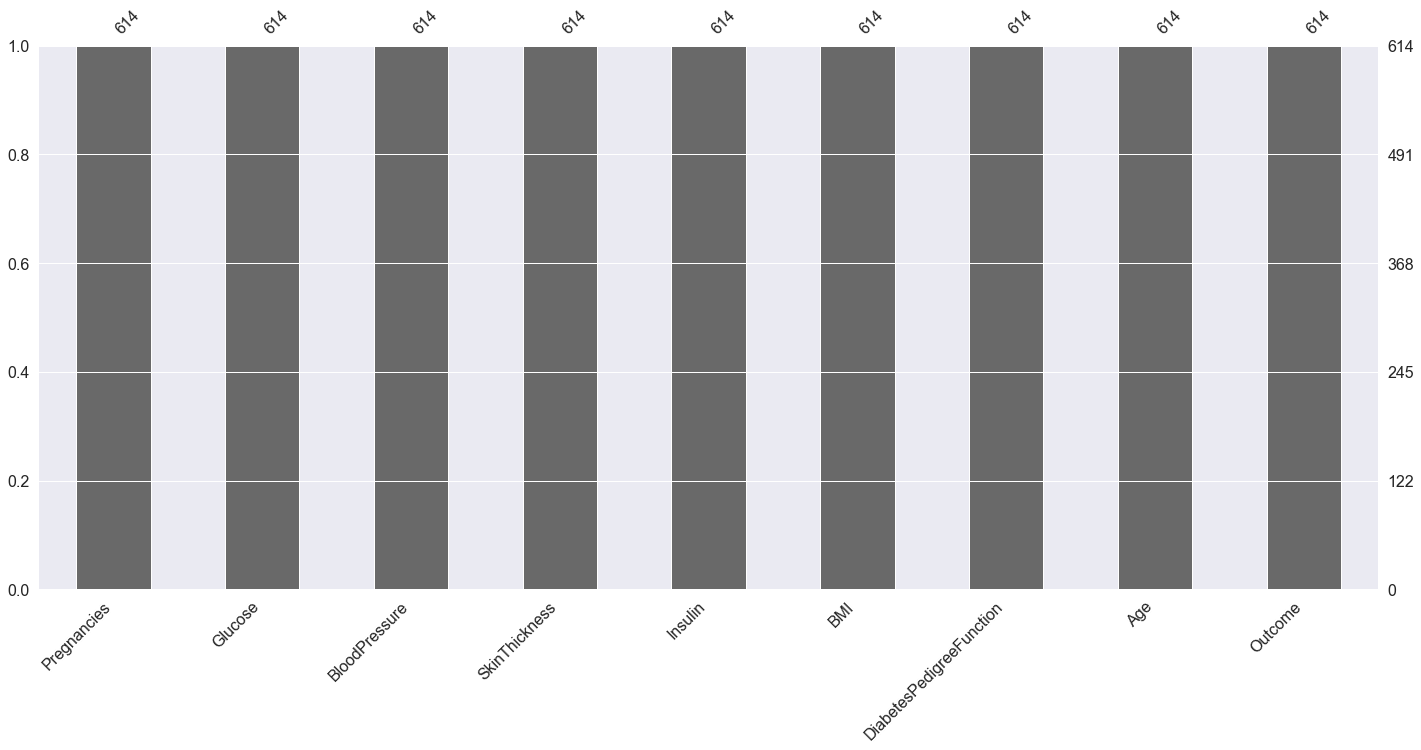

In [12]:
## Null count analysis 
import missingno as msno
p = msno.bar(diabetes_data_copy)

### Zero missing values

In [13]:
(diabetes_data_copy == 0).sum()

Pregnancies                  85
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     290
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     400
dtype: int64

- __Glucose__ seems to be the most important parameters 
- People with a low __BMI__, under 23 is not touch by the disease

## 2.2 Looking for Correlation

In [14]:
corr_matrix = diabetes_data_copy.corr()

In [15]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.512291
BMI                         0.328830
Age                         0.240676
SkinThickness               0.234260
Pregnancies                 0.208173
BloodPressure               0.183373
DiabetesPedigreeFunction    0.165312
Insulin                     0.164197
Name: Outcome, dtype: float64

<div class="alert alert-block alert-info">
<b>Interpretation</b>
    <ul>
        <li>best attributes, Glucose, BMI and Age</li>
        <li>we may delete the skin thickness atributes because it's not realy correlated and we have a lot of missing values</li>
    </ul>
</div>

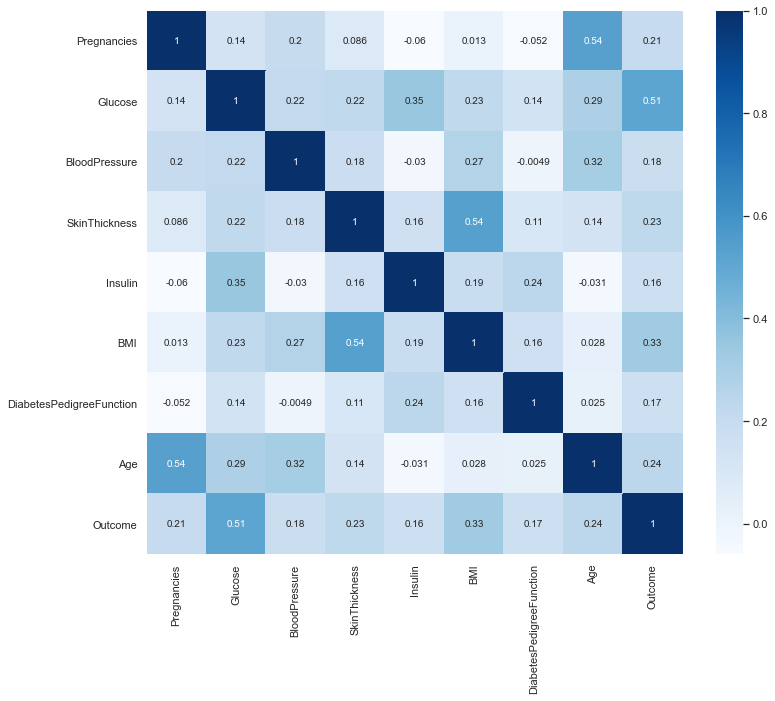

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
p = sns.heatmap(corr_matrix, annot=True, cmap='Blues')

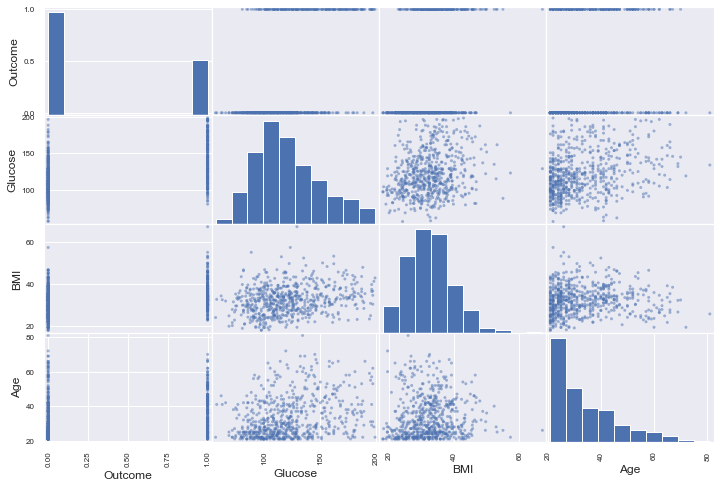

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['Outcome', 'Glucose', 'BMI', 'Age']
p = scatter_matrix(diabetes_data_copy[attributes], figsize=(12,8))

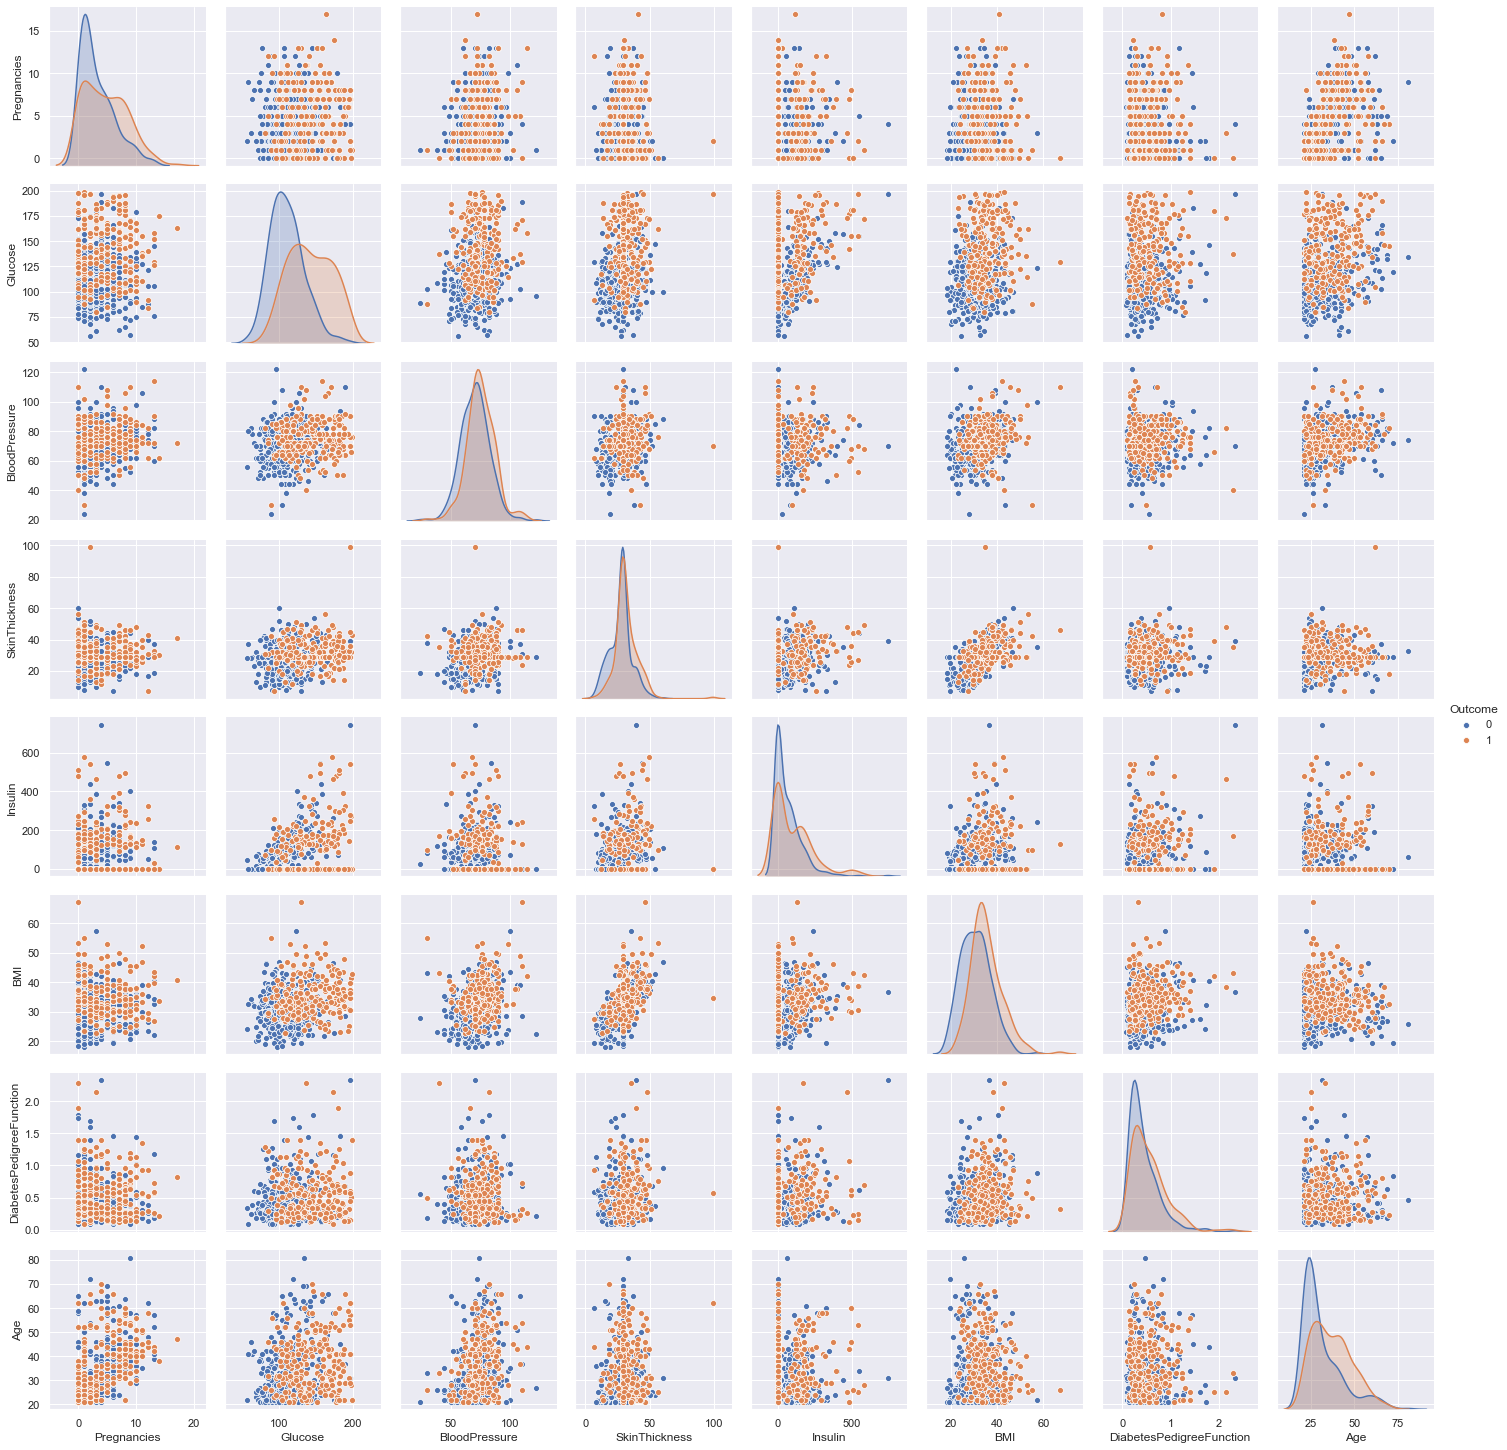

In [18]:
p = sns.pairplot(diabetes_data_copy, hue="Outcome")

no clean split with two variables

# 3. Prepare the Data 
---

In [19]:
X_train = train_set.drop("Outcome", axis=1)
y_train = train_set["Outcome"]

X_test = test_set.drop("Outcome", axis=1)
y_test = test_set["Outcome"]

# 4. Short-List Promising Model
---
Performance measure → `accuracy`

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Baseline model
↳ set all prediction to 0

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class NeverTrueClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros(len(X))

## Train many quick and dirty model from different categories 
- Baseline model
- SGD
- Linear SVC
- SVC
- KNeighbors Classifiers
- Random Forest

In [45]:
# Select few models to test
def quick_models(prefix=""):
    models = []
    models.append((f"{prefix}Baseline", NeverTrueClassifier()))
    models.append((f"{prefix}SGD", SGDClassifier(random_state=42)))
#     models.append((f"Linear_SVC{prefix}", LinearSVC(random_state=42))) # max iter pb
    models.append((f"{prefix}SVC", SVC(random_state=42)))
    models.append((f"{prefix}KNN", KNeighborsClassifier()))
    models.append((f"{prefix}RandomForest", RandomForestClassifier(random_state=42)))
    return models

In [46]:
# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, scoring="accuracy", model_type="vanilla"):
        self.models = models
        self.scoring = scoring
        self.type = model_type
        self.names = []
        self.scores = []
        
    def get_scores(self, X,y):
        for name, model in self.models:
            score = cross_val_score(model, X, y, scoring=self.scoring, cv=10)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean()} (+/-{(score).std()})")
            
    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
        self.table["type"] = self.type
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title=self.type.upper())
        fig.show()
    
    def recap(self, X, y):
        self.get_scores(X, y)
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [48]:
# Test the performance on models without any preprocessing 
models = CompareModels(quick_models())
models.recap(X_train, y_train)

Baseline------------> 0.0 (0.0)
SGD-----------------> 0.3534285530420766 (0.22371248883591235)
SVC-----------------> 0.5842102508340365 (0.10825788775503464)
KNN-----------------> 0.5648828922007205 (0.0784506718124845)
RandomForest--------> 0.6115902409366091 (0.09787029622226699)


,Model,f1
2,RandomForest,0.611590
4,SVC,0.584210
1,KNN,0.564883
3,SGD,0.353429
0,Baseline,0.000000


## Create the Preprocessing Pipeline
↳ embed data cleaning step in sklearn function

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None  # default='warn'

pre_process = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [50]:
# test with Standardisation 
X_train_scaled = pre_process.fit_transform(X_train)

preprocess_models = CompareModels(quick_models(), model_type="standard")
preprocess_models.recap(X_train_scaled, y_train)

Baseline------------> 0.0 (0.0)
SGD-----------------> 0.6422971198269545 (0.08123096284604639)
SVC-----------------> 0.6316211416211417 (0.03318701629486897)
KNN-----------------> 0.6067098619730198 (0.07284677621675963)
RandomForest--------> 0.6146270007435908 (0.08601816293242621)


,Model,f1
3,SGD,0.642297
4,SVC,0.631621
2,RandomForest,0.614627
1,KNN,0.606710
0,Baseline,0.000000


In [51]:
# compare pipeline perf
def compare_pipeline(models1, models2):
    df = pd.concat([models1.table, models2.table])
    display(px.box(df, x="Model", y="accuracy", color="type"))
    return df.pivot_table(values="accuracy", index="Model", columns="type")

compare_pipeline(models, preprocess_models)

type,standard,vanilla
Model,,
Baseline,0.000000,0.000000
KNN,0.606710,0.564883
RandomForest,0.614627,0.611590
SGD,0.642297,0.353429
SVC,0.631621,0.584210


→ Models react better with standardisation

#### Promissing model: `SVC`, `KNN` and `Random forest`

# 5. Fine Tune
---

## A. Feature Selection pipeline

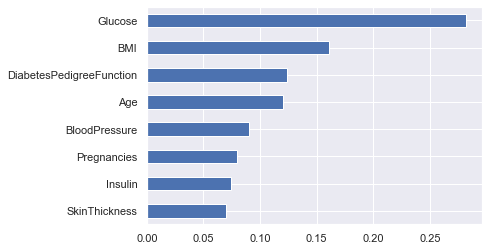

In [52]:
# feature importance
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train)
feature_importances = forest_clf.feature_importances_
pd.Series(index=X_train.columns, data=feature_importances).sort_values().plot.barh()

In [53]:
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = np.argsort(self.feature_importances)[-self.k:]
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [54]:
pipeline_f_select = Pipeline([
    ("standardisation", pre_process), 
    ("feature_selection", TopFeatureSelector(feature_importances, k=8)),
])

# pipeline_f_select.fit_transform(X.copy())

## B. Tune parameters

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [56]:
def print_best(estimators):
    print(f"Best: {estimators.best_score_} using {estimators.best_params_}")

## SVC

In [57]:
svc_model = make_pipeline(pipeline_f_select, SVC(random_state=42))

param = dict( 
    svc__kernel = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ],
    pipeline__feature_selection__k = [2,3,4,5,6,7,8],
    svc__C = [0.1, 0.5, 1, 1.5, 2]
)

prediction_SVC = GridSearchCV(svc_model, param ,cv=5, scoring="accuracy", return_train_score=True)
prediction_SVC.fit(X_train, y_train)

print_best(prediction_SVC)

Best: 0.786711981873917 using {'pipeline__feature_selection__k': 4, 'svc__C': 0.5, 'svc__kernel': 'rbf'}


## Random Forest

In [58]:
rf_model = make_pipeline(pipeline_f_select, RandomForestClassifier(random_state=42))

param = dict( 
    randomforestclassifier__n_estimators = [25, 50, 75, 100],
    pipeline__feature_selection__k = [2,3,4,5,6,7,8],
    randomforestclassifier__max_depth = [2,4,6,8, None]
)

prediction_rf = GridSearchCV(rf_model, param ,cv=5, scoring="accuracy", return_train_score=True)
prediction_rf.fit(X_train, y_train)

print_best(prediction_rf)

Best: 0.7818339330934293 using {'pipeline__feature_selection__k': 4, 'randomforestclassifier__max_depth': 6, 'randomforestclassifier__n_estimators': 75}


## KNN Neighbours 

In [59]:
knn_model = make_pipeline(pipeline_f_select, KNeighborsClassifier())

param = dict( 
    kneighborsclassifier__n_neighbors = np.arange(5,20),
    pipeline__feature_selection__k = [2,3,4,5,6,7,8])

prediction_knn = GridSearchCV(knn_model, param ,cv=5, scoring="accuracy", return_train_score=True)
prediction_knn.fit(X_train, y_train)

print_best(prediction_knn)

Best: 0.7850992936158872 using {'kneighborsclassifier__n_neighbors': 17, 'pipeline__feature_selection__k': 4}


# 6. Test Set
---

In [60]:
# keep the best model SVC with a rbf kernel 4 features and C = 0.5
model = prediction_SVC.best_estimator_

In [61]:
model.score(X_test, y_test)

0.7337662337662337

↳ My models overfit the trainset

Improvement :
    - use the f1 scores